In [1]:
import warnings

warnings.filterwarnings('ignore')

import jieba
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.feature_extraction.text as ft

# 加载文件
data = pd.read_csv("htl_all.csv")
data["label"].value_counts()

1    5322
0    2443
Name: label, dtype: int64

In [2]:

def func(item):
    # 分词
    seg_list = jieba.cut_for_search(item)
    return ' '.join(seg_list)


# print(data['discuss'])
data['new_review'] = data['review'].apply(func)
# data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\juemie\AppData\Local\Temp\jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built successfully.


In [3]:

# 整理输入集与输出集     TFIDF
cv = ft.CountVectorizer()
bow = cv.fit_transform(data['new_review'])
tt = ft.TfidfTransformer()
tfidf = tt.fit_transform(bow)
# print(tfidf.shape)

# 拆分测试集与训练集
train_x, test_x, train_y, test_y = ms.train_test_split(tfidf,
                                                       data["label"],
                                                       test_size=0.3,
                                                       random_state=7)

In [4]:

# 整理输入集与输出集，拆分测试集与训练集

# x, y = data[:, :-1], data['label']
model = lm.LogisticRegression()
#
# # 做5次交叉验证
# scores = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
# print(scores.mean())
# scores = ms.cross_val_score(model, x, y, cv=5, scoring='precision_weighted')
# print(scores.mean())
# scores = ms.cross_val_score(model, x, y, cv=5, scoring='recall_weighted')
# print(scores.mean())
# scores = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
# print(scores.mean())

In [5]:
model.fit(train_x, train_y)
# 评估 模型准确率
pred_test_y = model.predict(test_x)
# print(pred_test_y)
print(test_y.values)
print((pred_test_y == test_y).sum() / test_y.size)

[1 1 1 ... 0 1 1]
0.8553648068669528


[[ 457  260]
 [  77 1536]]
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       717
           1       0.86      0.95      0.90      1613

    accuracy                           0.86      2330
   macro avg       0.86      0.79      0.82      2330
weighted avg       0.86      0.86      0.85      2330



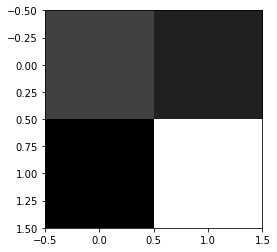

In [6]:
# 针对测试集进行评估
m = sm.confusion_matrix(test_y, pred_test_y)
print(m)
plt.imshow(m, cmap='gray')

# 输出分类报告
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

In [7]:
test_data = ["总体来说房间非常干净，卫浴设置也相当不错，交通也比较便利",
             "酒店交通方便，环境也不错，正好是我们办公地点的旁边，感觉性价比也还可以",
             "设施还可以，服务人员态度也不错，交通还算便利",
             "酒店位于交通要道上，标志和明显很好找，晚上比较安静，早餐挺不错，服务也比较到位",
             "酒店服务态度极差，设施很差",
             "我住过的最不好的酒店，以后绝不会再住了",
             "说实在的，我很失望，我想这家酒店以后无论如何也不会再去了",
             "刚住进去，就闻到一股异味，感觉极不舒服。晚上蚊子比较多，地板上也比较脏，电视遥控器都是坏的。还这么高的价格",
             "交通不便利，环境也不怎么样，也没有早餐。但是价格便宜，性价比比价高，毕竟只有那点钱",
             "交通方便，环境也不错，房间非常干净，卫浴设置也相当不错。晚上蚊子比较多，地板上也比较脏。总之没有说的那么好", ]

test_data = pd.Series(test_data).apply(func)
# 把样本按照训练时的方式转换为tfidf矩阵，才可以继续预测
bow = cv.transform(test_data)
test_data = tt.transform(bow)
pred_test_y = model.predict(test_data)

# 输出置信概率
pred_prob_y = model.predict_proba(test_data)

print(pred_test_y)
probs = pred_prob_y.max(axis=1)

for b, c in zip(pred_test_y, probs):
    print(b, ':', c)


[1 1 1 1 0 0 0 0 1 1]
1 : 0.9852840788510052
1 : 0.9870012696225303
1 : 0.984657908882155
1 : 0.9642172084340737
0 : 0.9461334889797953
0 : 0.8931370498613155
0 : 0.9180643060432327
0 : 0.5332696532324024
1 : 0.8254505035965283
1 : 0.9695538700127184
